# Pandas
## Chapter1: Vectorized Operations

In [1]:
import pandas as pd
import numpy as np

Create random data:

In [2]:
def get_data(size= 10000):
    df = pd.DataFrame()
    size = 10000
    df['age'] = np.random.randint(20,35,size)
    df['sleep_times'] = np.random.randint(0,9,size)
    df['avg_exercise_hours_per_day'] = np.random.randn(size)*0.5 + 1.0
    df['breakfast'] = np.random.choice(['bread & butter & milk','bread & cheese','bread & cheese & milk','bread & butter',' bread & cheese& eggs'], size)
    df['launch'] = np.random.choice(['pizza','chicken','burger','rice'], size)
    df['mid_day_meal'] = np.random.choice(['apple','orange','banana'],size)
    df['dinner'] = np.random.choice(['pizza','hotdog sandwich','fries chicken','vegetables','Grilled chicken fillet','Boiled egg'],size)
    df['Health_life?'] = np.zeros(shape=size,dtype=bool)
    return df

df = get_data()
df.head(10)

,age,sleep_times,avg_exercise_hours_per_day,breakfast,launch,mid_day_meal,dinner,Health_life?
0,21,6,0.700319,bread & butter,rice,banana,Grilled chicken fillet,False
1,29,1,1.061148,bread & cheese & milk,chicken,apple,vegetables,False
2,23,0,1.544252,bread & cheese & milk,chicken,banana,pizza,False
3,27,8,1.045223,bread & cheese& eggs,rice,apple,Grilled chicken fillet,False
4,26,8,1.073202,bread & cheese& eggs,pizza,banana,vegetables,False
5,29,1,1.121552,bread & cheese & milk,pizza,banana,fries chicken,False
6,33,0,1.619655,bread & cheese& eggs,pizza,orange,vegetables,False
7,34,5,1.788824,bread & cheese& eggs,chicken,banana,vegetables,False
8,26,5,1.899963,bread & cheese,chicken,banana,Grilled chicken fillet,False
9,33,3,0.475310,bread & cheese,burger,apple,Boiled egg,False


**Healthy Life finder** :
Healthy Metrics
* If they sleep  <span style="color:red"> for  more than 6 hours and less than 8 </span>.
* if they exercise more than<span style="color:red"> 1 hour per day </span>
* If their <span style="color:yellow">breakfast</span> only includes    <span style="color:green">bread,cheese,Milk</span>
* If their <span style="color:yellow">launch   </span> only includes    <span style="color:green">chicken,burger,rice</span>
* If their <span style="color:yellow">dinner   </span> only includes    <span style="color:green">vegetables,Grilled chicken fillet,Boiled egg</span>

This can be represented using the following equation

In [3]:
def Healthy_Life_finder(row):
    if (row['sleep_times'] >=6) and (row['sleep_times'] <=8):
        if (row['avg_exercise_hours_per_day'] > 1) :
            if (row['breakfast'] in ['bread & cheese','bread & cheese & milk']):
                if(row['launch'] in ['chicken','burger','rice']):
                    if(row['dinner'] in ['vegetables','Grilled chicken fillet','Boiled egg']):     
                        return True
    return False

### Level 1: Loops

The first and straightforward approach is to use for loops to iterate over each row of the data frame.

In [4]:
df = get_data()

In [5]:
%%time

for index, row in df.iterrows():
   df.loc[index,'Health_life?'] = Healthy_Life_finder(row)

       

CPU times: user 2.47 s, sys: 15 ms, total: 2.48 s
Wall time: 2.52 s


As we can see the computation time used to iterate through every row of the data frame is 2.5 s. Given that the data has only 10000 rows which are considered small. So if the data have millions of rows so it will take hours to do only one task. Therefore this is not the most efficient way to iterate through a data frame. So let's discuss the second method which will improve the time complexity.

### Level 2: Apply

The .apply() method in pandas is used to apply a function to each element in a pandas dataframe. It can be used to apply a custom function to each element in a specific column or to apply a function along either axis (row-wise or column-wise) of the dataframe. Let's use it to apply the reward calculation function to each row of the data frame and then calculate the computational time:

In [6]:
df = get_data()

In [7]:
%%time
df['Health_life?'] = df.apply(Healthy_Life_finder, axis = 1)

CPU times: user 71.5 ms, sys: 19.5 ms, total: 91 ms
Wall time: 109 ms


The average time to apply the function to the 10000 rows of the data frame is only 109 ms which is 0.109 seconds. This is around 28 times faster than using the loops. However, we are still not done. We can still improve the speed and make it 1000 times faster. Let's see how!

### Level 3: Vectorized 

Vectorization in pandas refers to the process of applying operations to entire arrays or sequences of data, as opposed to applying them to individual elements one by one. This is done for performance reasons, as vectorized operations are usually much faster than non-vectorized operations, especially in large datasets.

Let's apply this to the data using the conditions stated above:

In [8]:
df = get_data()


In [9]:
%%time
df.loc[((df['sleep_times'] >=6) & (df['sleep_times'] <=8)) &
       (df['avg_exercise_hours_per_day'] > 1) &
       (df['breakfast'].isin(['bread & cheese','bread & cheese & milk'])) &
       (df['launch'].isin(['chicken','burger','rice'])) &
       (df['dinner'].isin(['vegetables','Grilled chicken fillet','Boiled egg'])), 'Health_life?'] = True


CPU times: user 2.78 ms, sys: 7.88 ms, total: 10.7 ms
Wall time: 10.1 ms


We can see now a tremendous decrease in the computation time compared to the previous two methods. The computation time has at least decreased by 370. Let's have a look at the differences in a bar plot.

### Plot differences



Finally to have a better intuition of the difference between these different three methods. We will plot a bar plot diagram using the code below:

<Axes: xlabel='method'>

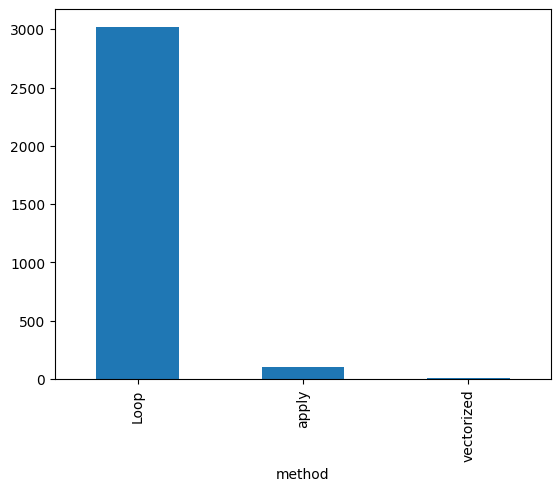

In [10]:
results = pd.DataFrame(
    [
        ["Loop", 3020 ],
        ["apply", 106],
        ['vectorized', 8.2]
        
    ],
    columns = ['method', 'run_time']

)
results.set_index('method')['run_time'].plot(kind='bar')

Looking at the bar plot we can get a better intuition of the huge difference between the different computational times of the different methods used in this article.